<a href="https://colab.research.google.com/github/Reehana7860/machine-learning-projects/blob/main/pan_card_Tampering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imutils
!pip install skimage
!pip install requests

ERROR: Could not find a version that satisfies the requirement skimage (from versions: 0.0)
ERROR: No matching distribution found for skimage


In [ ]:
from skimage.metrics import structural_similarity
import cv2
import requests
from PIL import Image
import imutils


In [ ]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

mkdir: cannot create directory ‘pan_card_tampering’: File exists
mkdir: cannot create directory ‘pan_card_tampering/image’: File exists


In [ ]:
original = Image.open(requests.get('https://5.imimg.com/data5/XC/LH/BB/ANDROID-13177721/product-jpeg-500x500.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://images.indianexpress.com/2017/01/pan-card-india-759.jpg', stream=True).raw)

In [ ]:
print("original image format :",original.format)
print("original image format :",original.size)

print("tampered image format :",tampered.format)
print("tampered image format :",tampered.size)


original image format : JPEG
original image format : (500, 312)
tampered image format : JPEG
tampered image format : (759, 422)


In [ ]:
original = original.resize((250,160))
print(original.size)
original.save('/content/pan_card_tampering/image/original.png')

tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('/content/pan_card_tampering/image/tampered.png')

(250, 160)
(250, 160)


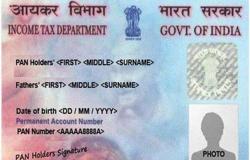

In [ ]:
tampered

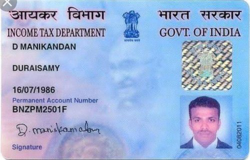

In [ ]:
original

In [ ]:
original = cv2.imread('/content/pan_card_tampering/image/original.png')
tampered = cv2.imread('/content/pan_card_tampering/image/tampered.png')

In [ ]:
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [ ]:
 #comaparing structural similarity between two images, difference image is returned
 
 (score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
 diff = (diff * 255).astype("uint8")
 print("ssim : {}".format(score))

ssim : 0.27601699279241165


In [ ]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:
for c in cnts:

  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x, y), (x+w, y+h), (0, 0, 255), 2)
  cv2.rectangle(tampered, (x, y), (x+w, y+h), (0, 0, 255), 2)





Original image


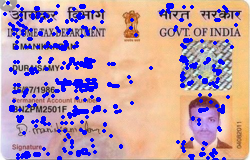

In [ ]:
#Display

print('Original image')
Image.fromarray(original)

tampered image


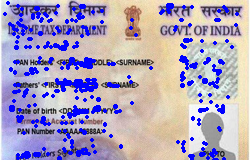

In [ ]:
print('tampered image')
Image.fromarray(tampered)

Different image


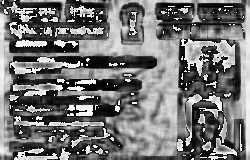

In [ ]:
print('Different image')
Image.fromarray(diff)

threshold image


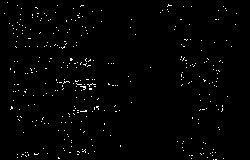

In [ ]:
print('threshold image')
Image.fromarray(thresh)